# Graphical EDA for Diabetes Datasets

This notebook performs Exploratory Data Analysis (EDA) on the following datasets:
- `playground-series-s5e12/train.csv`
- `playground-series-s5e12/test.csv`
- `diabetes_dataset.csv`

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load Data

In [9]:
# Define paths
TRAIN_PATH = '../input/playground-series-s5e12/train.csv'
TEST_PATH = '../input/playground-series-s5e12/test.csv'
DIABETES_PATH = '../input/diabetes_dataset.csv'

# Load datasets
df_train = pd.read_csv(TRAIN_PATH)
df_test = pd.read_csv(TEST_PATH)
df_diabetes = pd.read_csv(DIABETES_PATH)

print("Datasets loaded successfully!")

Datasets loaded successfully!


## 2. Basic Dataset Info

In [10]:
print("--- Train Data Info ---")
print(df_train.info())
display(df_train.head())

--- Train Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  700000 non-null  int64  
 1   age                                 700000 non-null  int64  
 2   alcohol_consumption_per_week        700000 non-null  int64  
 3   physical_activity_minutes_per_week  700000 non-null  int64  
 4   diet_score                          700000 non-null  float64
 5   sleep_hours_per_day                 700000 non-null  float64
 6   screen_time_hours_per_day           700000 non-null  float64
 7   bmi                                 700000 non-null  float64
 8   waist_to_hip_ratio                  700000 non-null  float64
 9   systolic_bp                         700000 non-null  int64  
 10  diastolic_bp                        700000 non-null  int64  
 11  he

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0


In [11]:
print("--- Test Data Info ---")
print(df_test.info())
display(df_test.head())

--- Test Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 25 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  300000 non-null  int64  
 1   age                                 300000 non-null  int64  
 2   alcohol_consumption_per_week        300000 non-null  int64  
 3   physical_activity_minutes_per_week  300000 non-null  int64  
 4   diet_score                          300000 non-null  float64
 5   sleep_hours_per_day                 300000 non-null  float64
 6   screen_time_hours_per_day           300000 non-null  float64
 7   bmi                                 300000 non-null  float64
 8   waist_to_hip_ratio                  300000 non-null  float64
 9   systolic_bp                         300000 non-null  int64  
 10  diastolic_bp                        300000 non-null  int64  
 11  hea

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,triglycerides,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history
0,700000,45,4,100,4.3,6.8,6.2,25.5,0.84,123,...,111,Female,White,Highschool,Middle,Former,Employed,0,0,0
1,700001,35,1,87,3.5,4.6,9.0,28.6,0.88,120,...,145,Female,White,Highschool,Middle,Never,Unemployed,0,0,0
2,700002,45,1,61,7.6,6.8,7.0,28.5,0.94,112,...,184,Male,White,Highschool,Low,Never,Employed,0,0,0
3,700003,55,2,81,7.3,7.3,5.0,26.9,0.91,114,...,128,Male,White,Graduate,Middle,Former,Employed,0,0,0
4,700004,77,2,29,7.3,7.6,8.5,22.0,0.83,131,...,133,Male,White,Graduate,Low,Current,Unemployed,0,0,0


In [12]:
print("--- Diabetes Dataset Info ---")
print(df_diabetes.info())
display(df_diabetes.head())

--- Diabetes Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 1

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


## 3. Univariate Analysis

Visualize distributions of numerical features in the Training set.

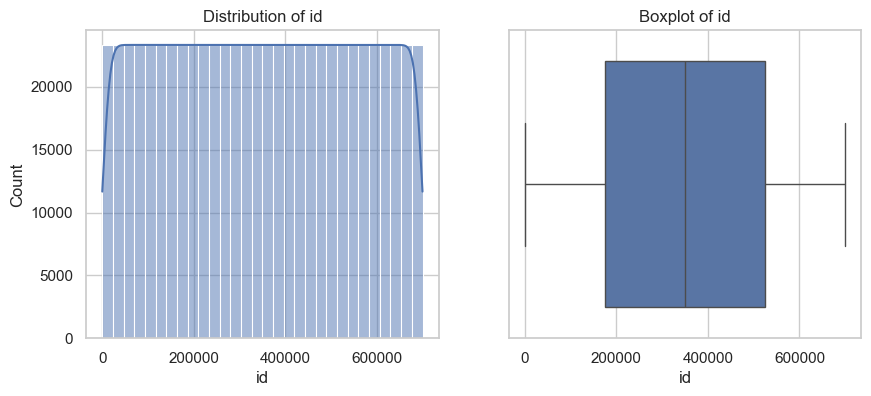

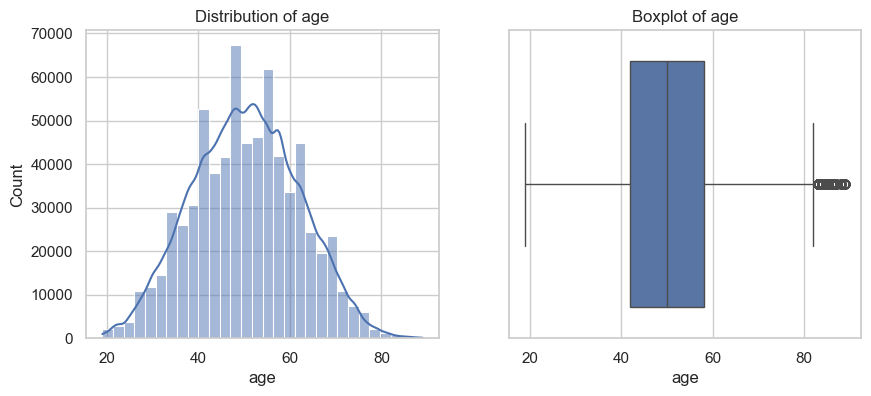

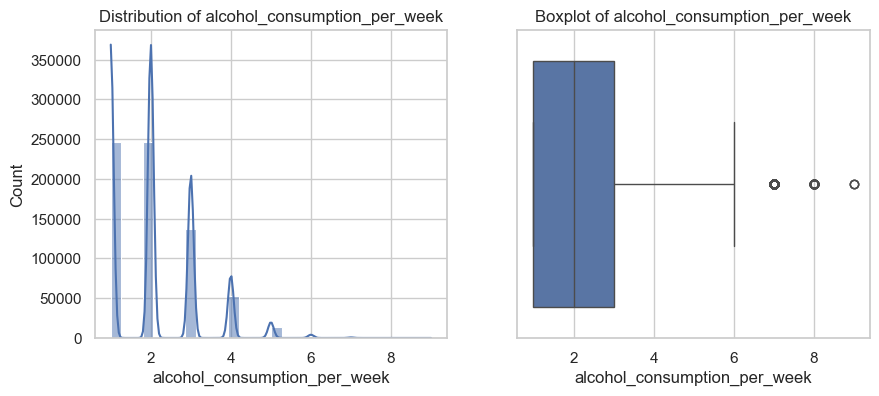

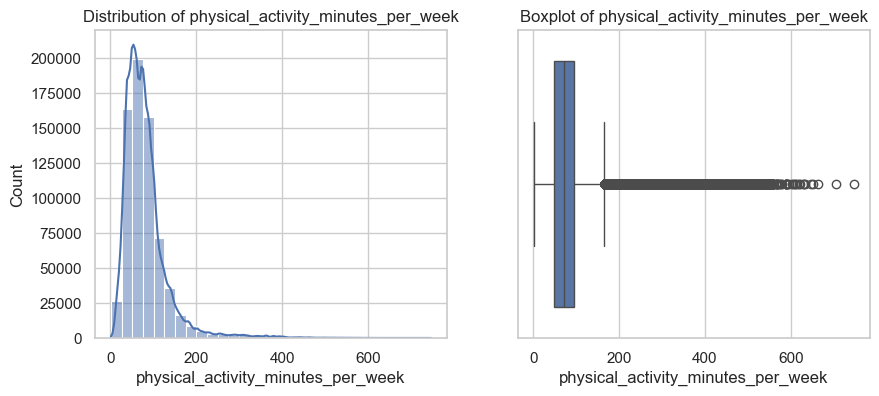

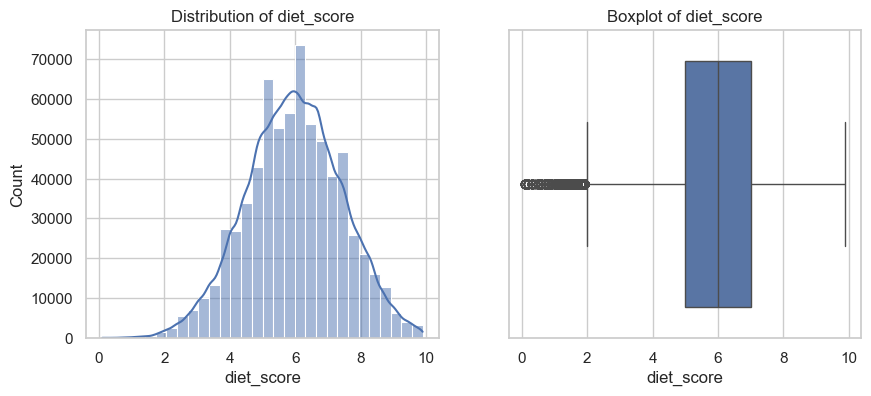

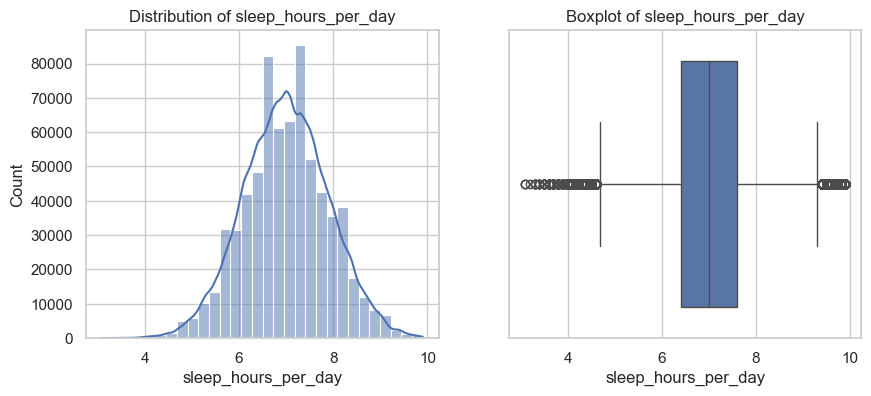

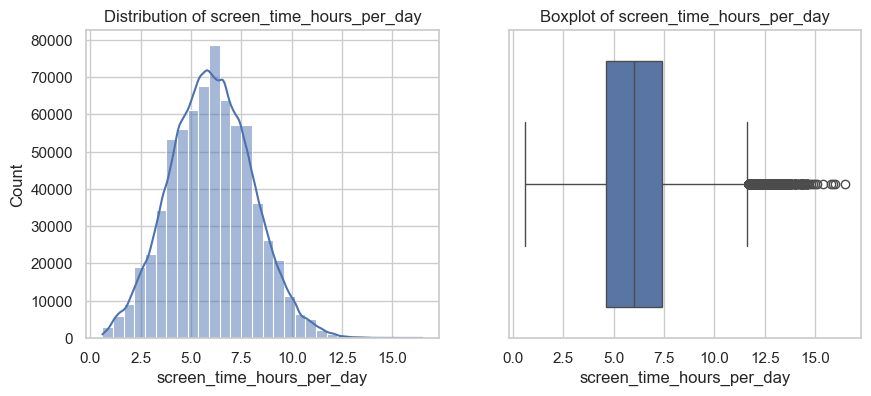

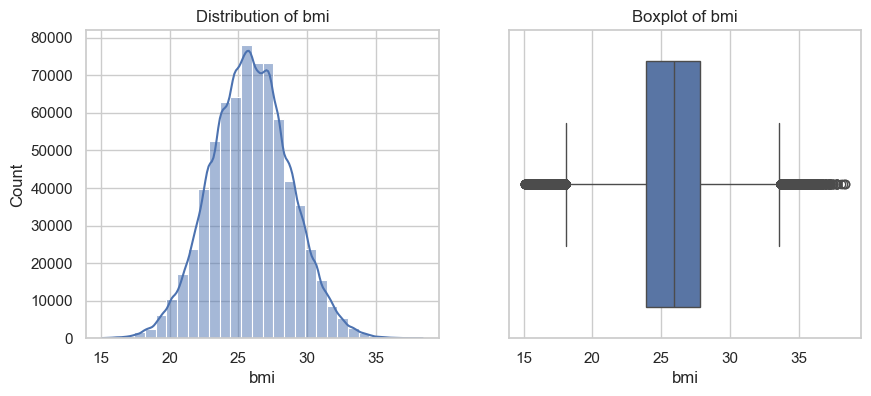

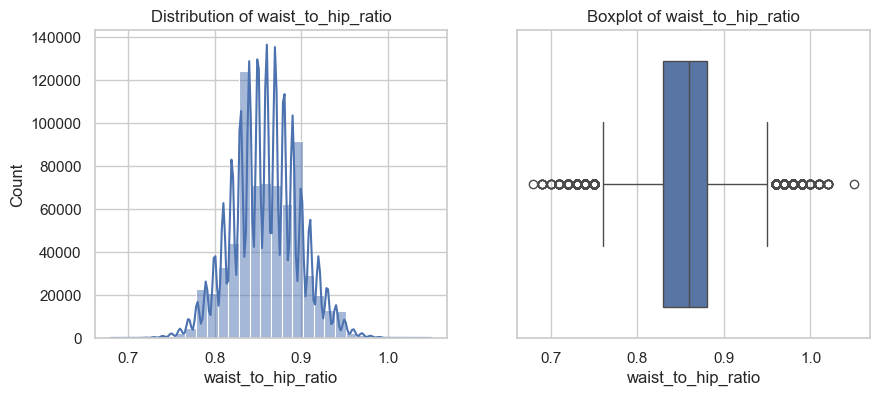

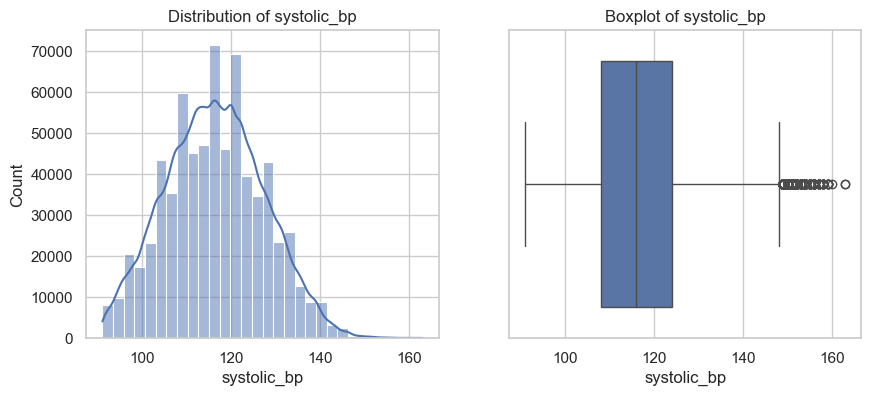

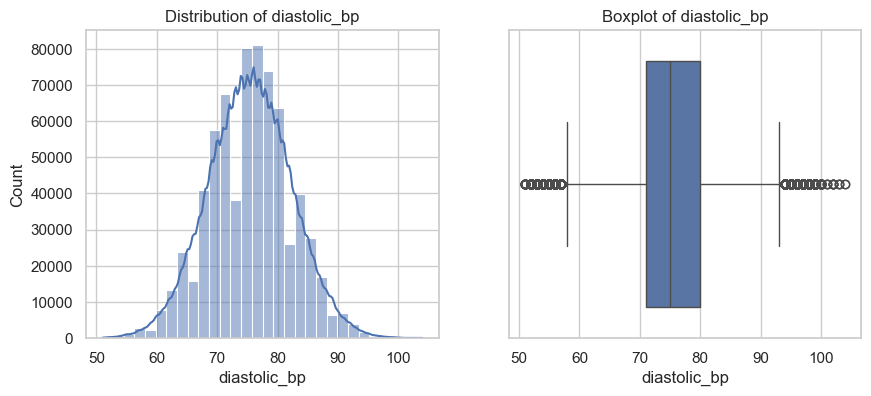

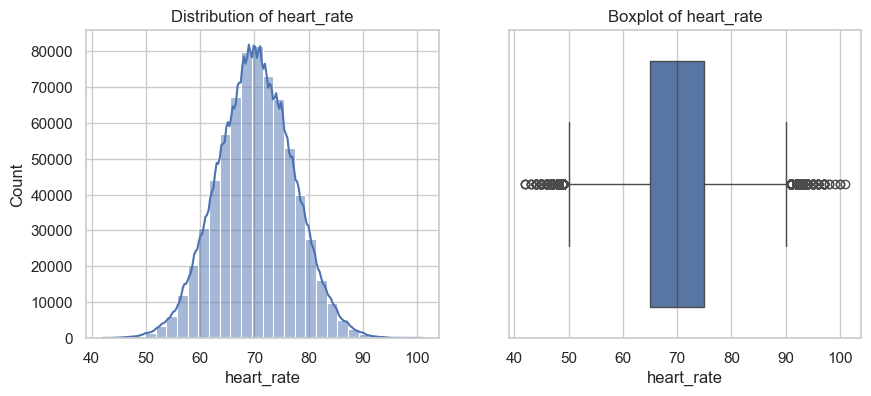

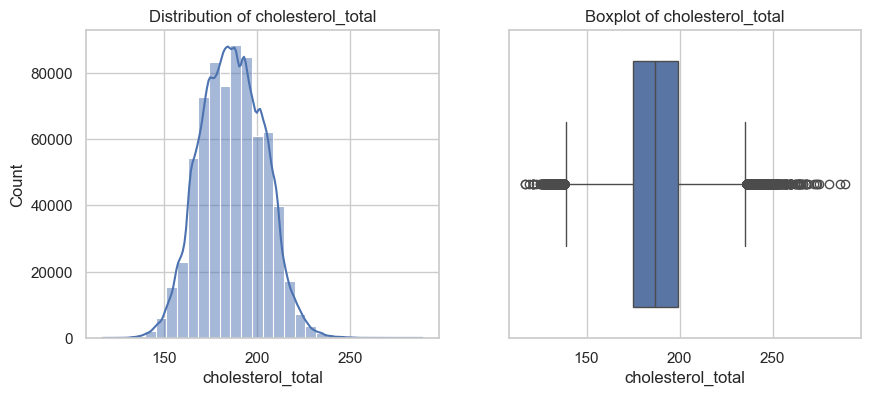

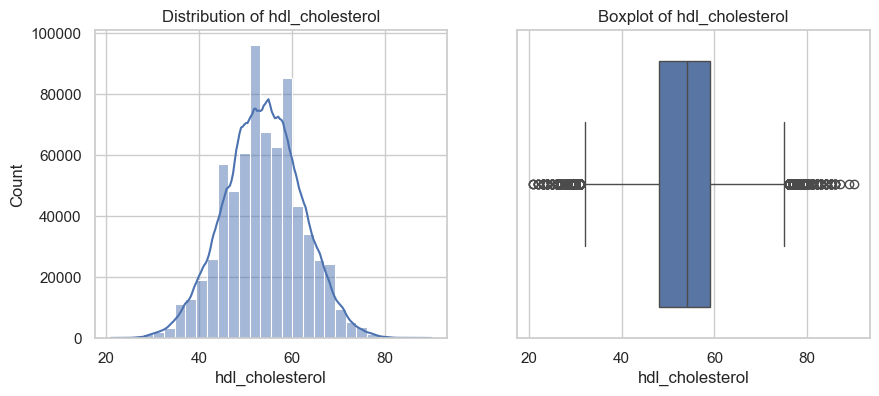

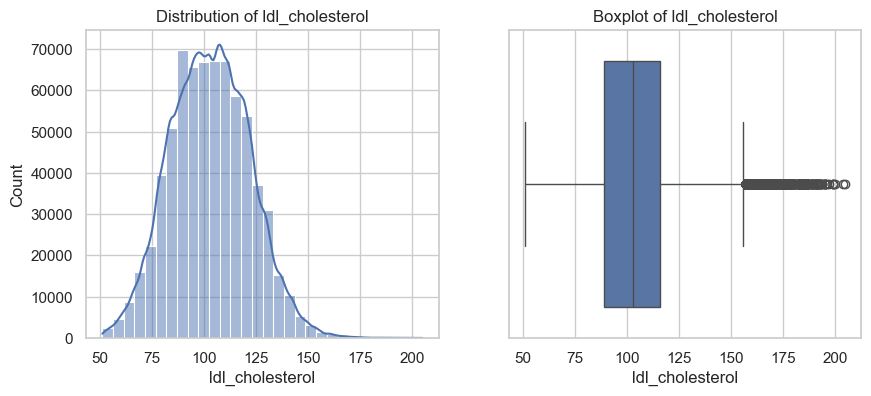

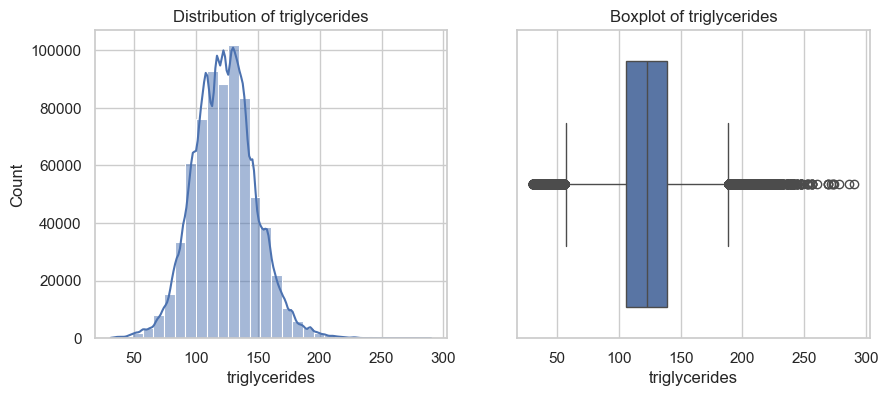

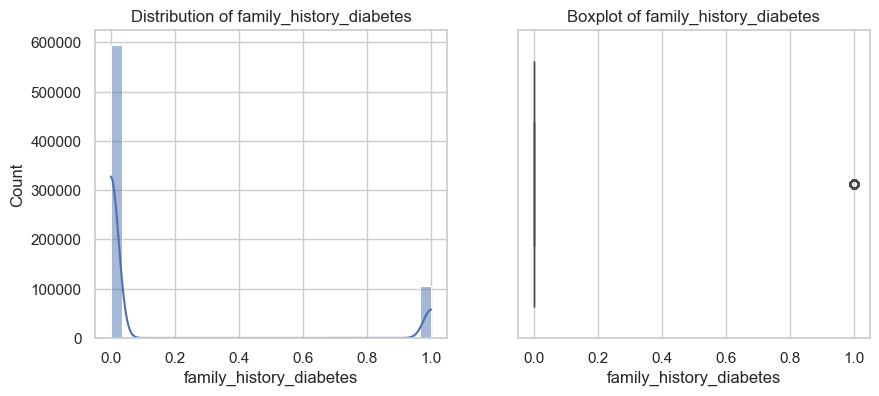

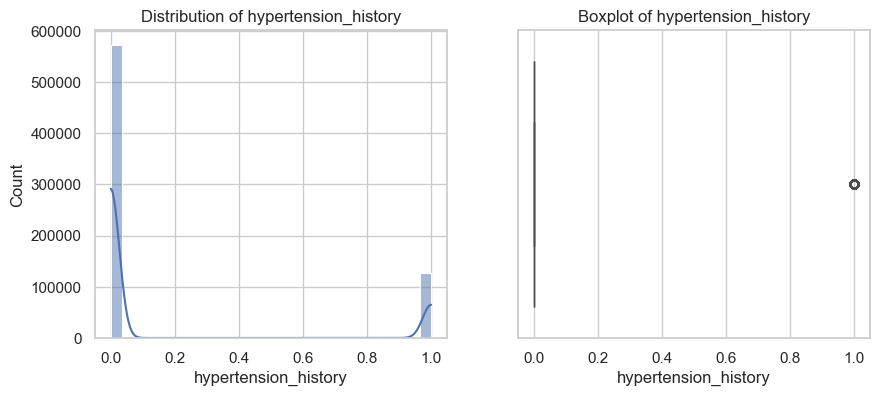

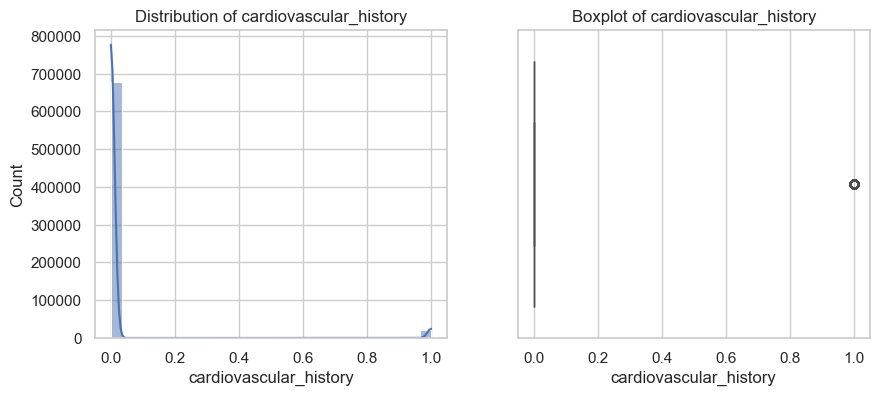

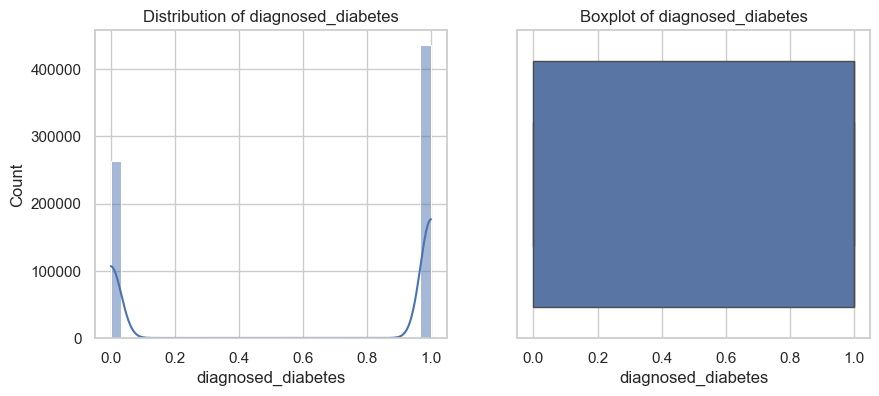

In [13]:
numerical_cols = df_train.select_dtypes(include=[np.number]).columns.tolist()

for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df_train[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_train[col])
    plt.title(f'Boxplot of {col}')
    
    plt.show()

## 4. Correlation Analysis

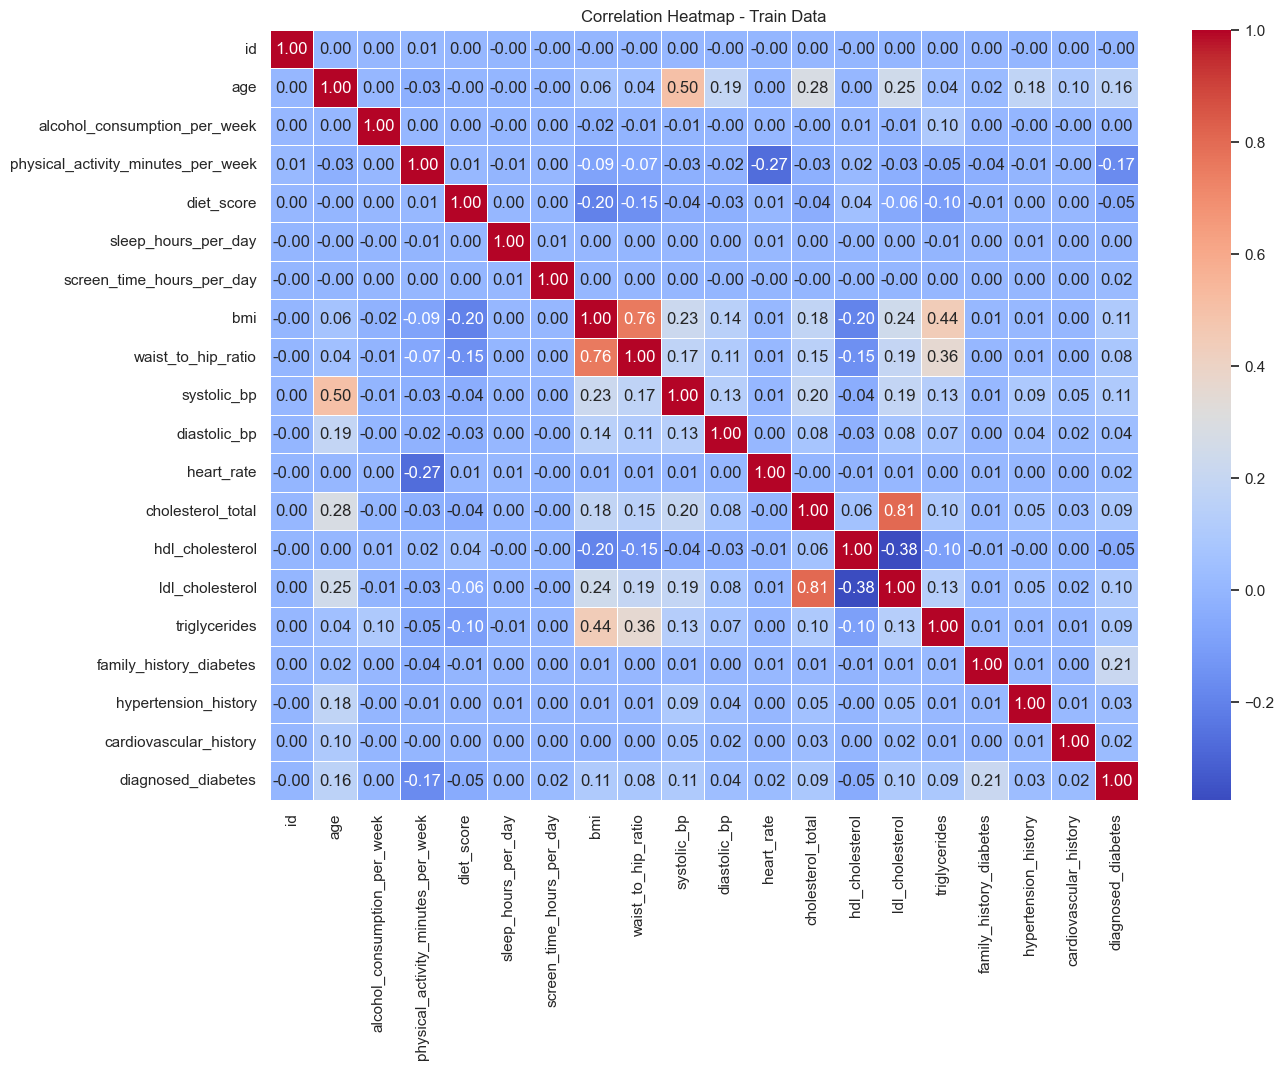

In [14]:
plt.figure(figsize=(14, 10))
correlation_matrix = df_train.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap - Train Data')
plt.show()

## 5. Comparison: Train vs. Diabetes Dataset

Common columns: ['alcohol_consumption_per_week', 'hdl_cholesterol', 'smoking_status', 'bmi', 'hypertension_history', 'ldl_cholesterol', 'heart_rate', 'family_history_diabetes', 'sleep_hours_per_day', 'age', 'physical_activity_minutes_per_week', 'diagnosed_diabetes', 'triglycerides', 'diet_score', 'gender', 'ethnicity', 'income_level', 'cardiovascular_history', 'cholesterol_total', 'screen_time_hours_per_day', 'diastolic_bp', 'education_level', 'systolic_bp', 'employment_status', 'waist_to_hip_ratio']


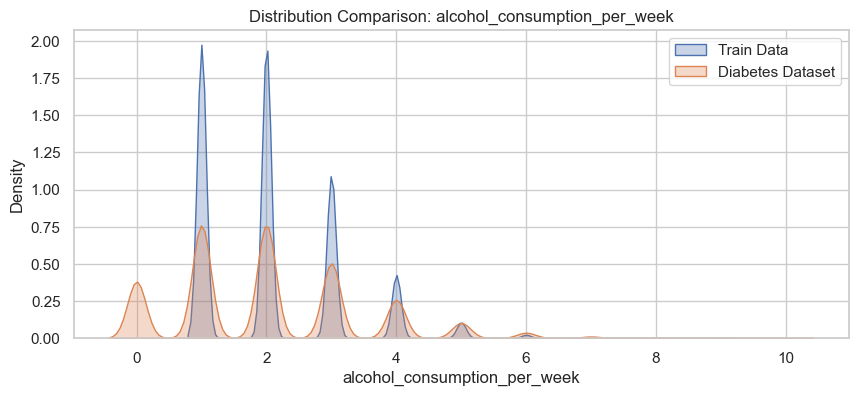

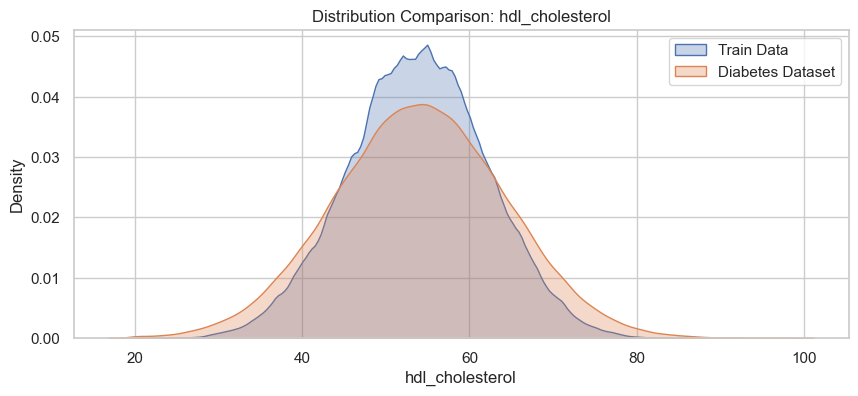

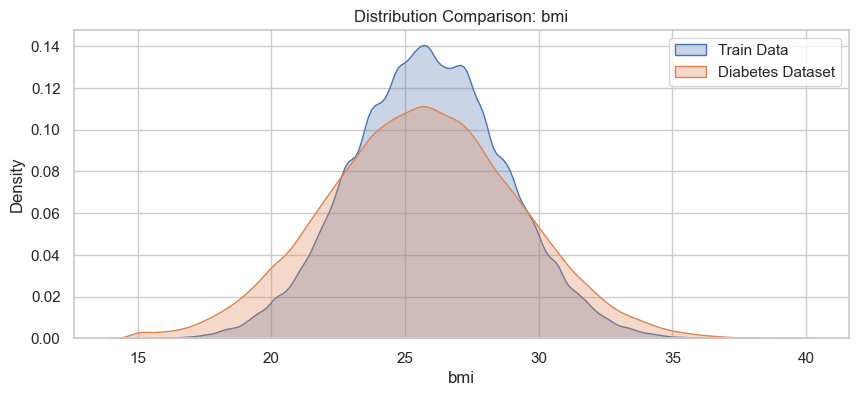

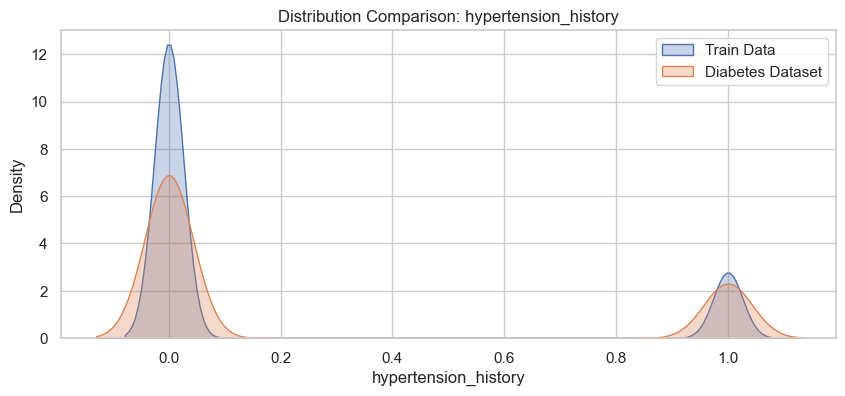

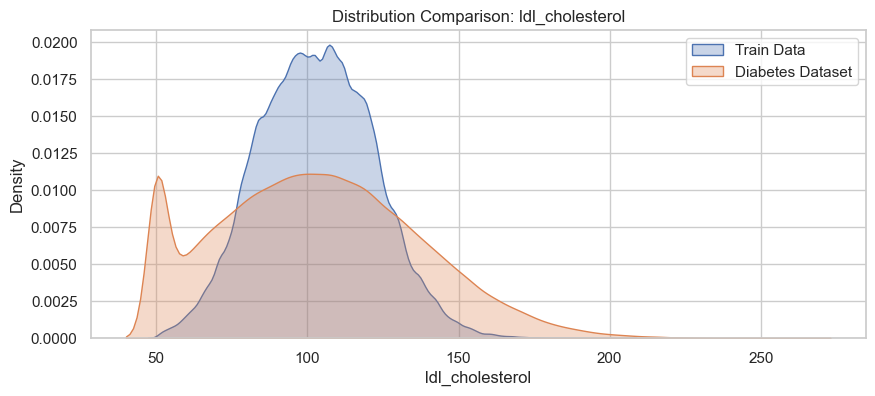

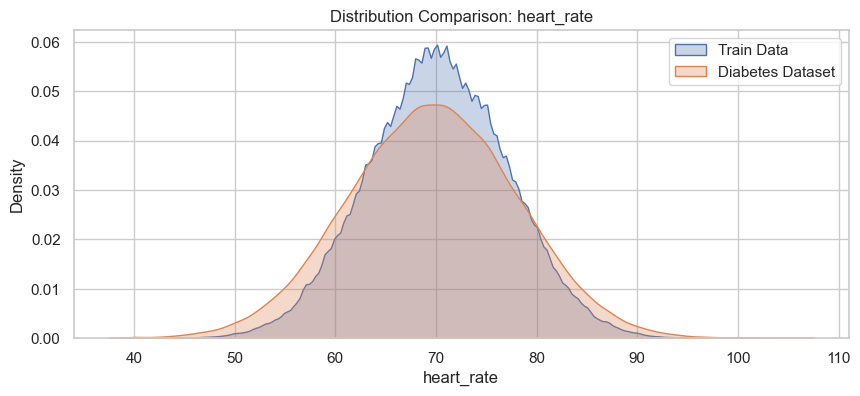

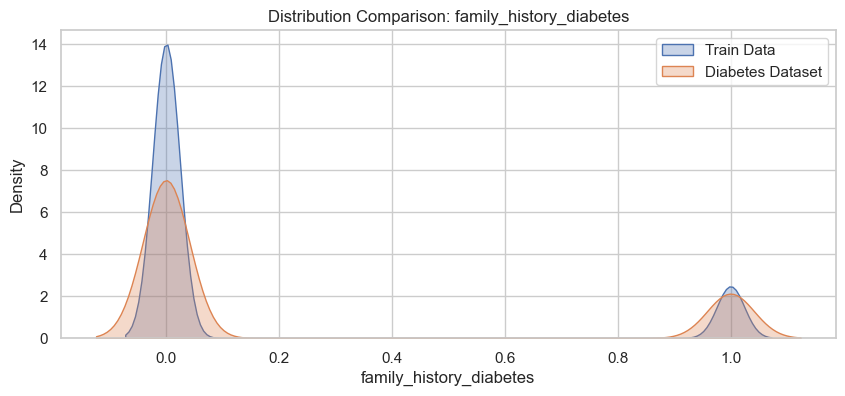

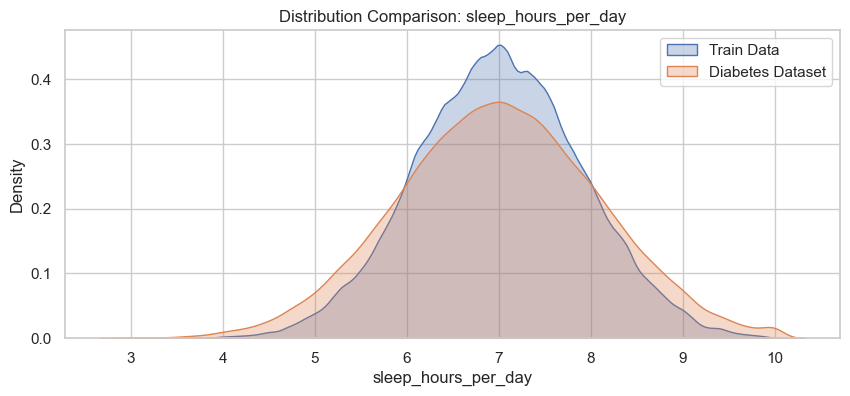

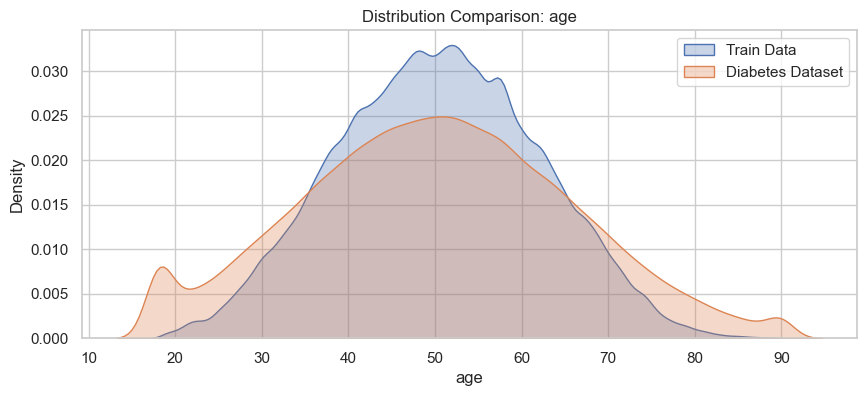

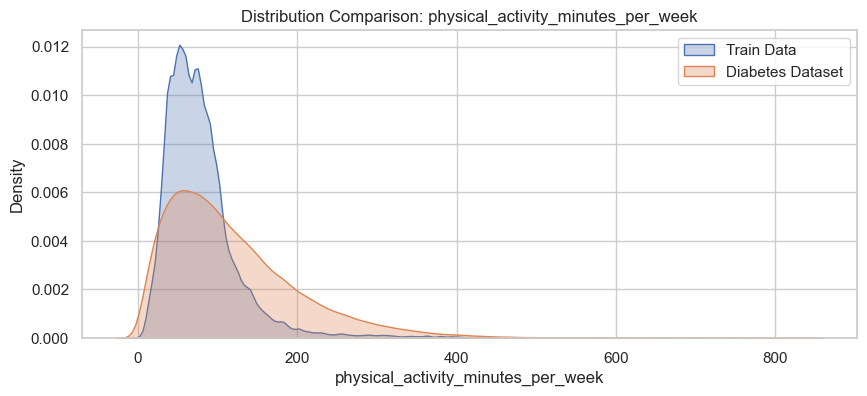

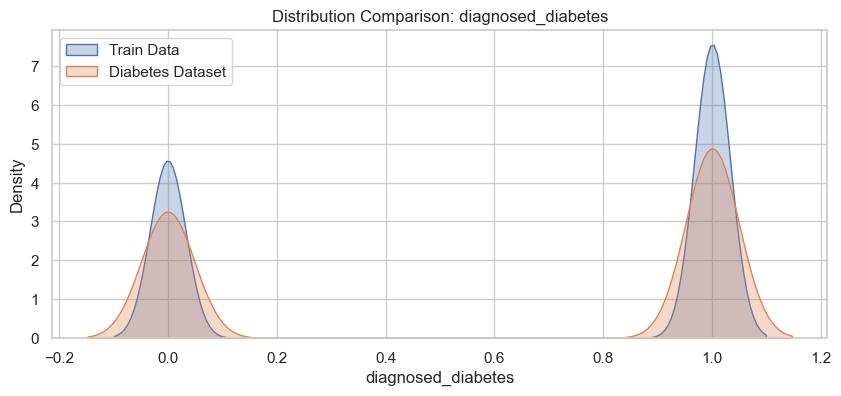

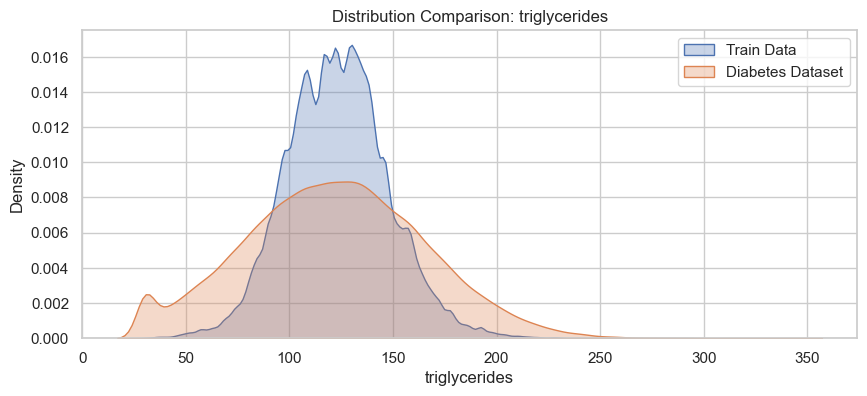

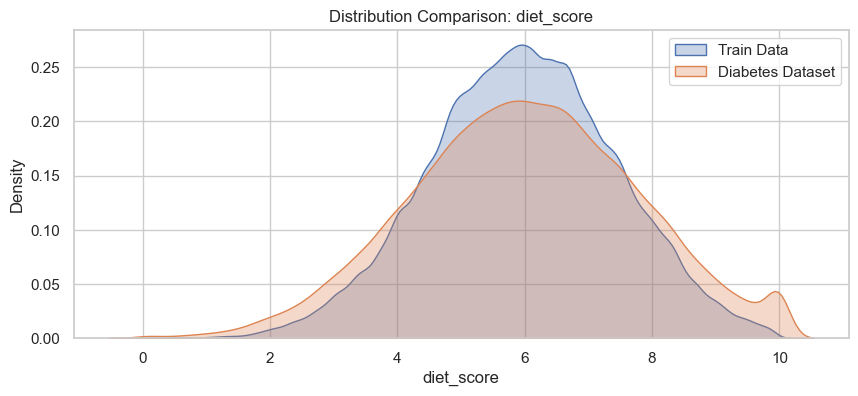

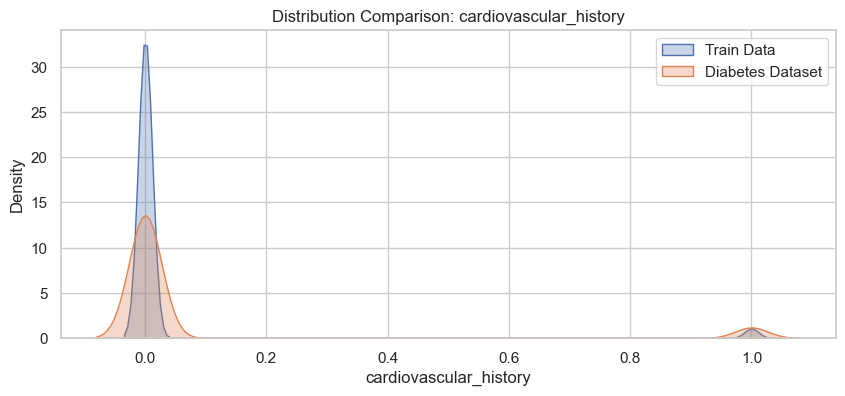

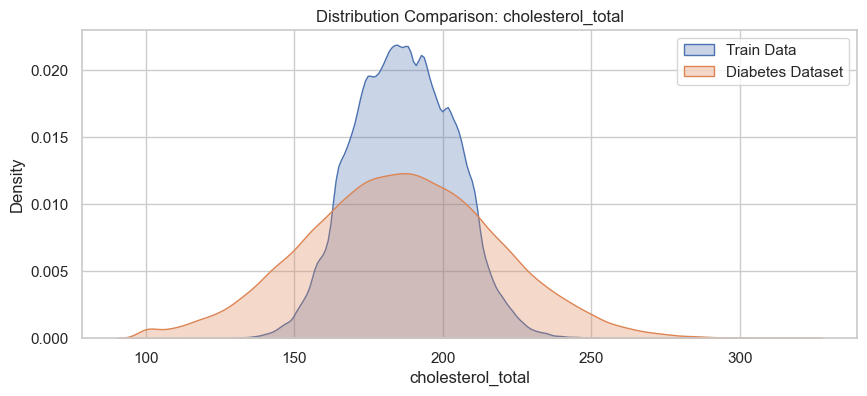

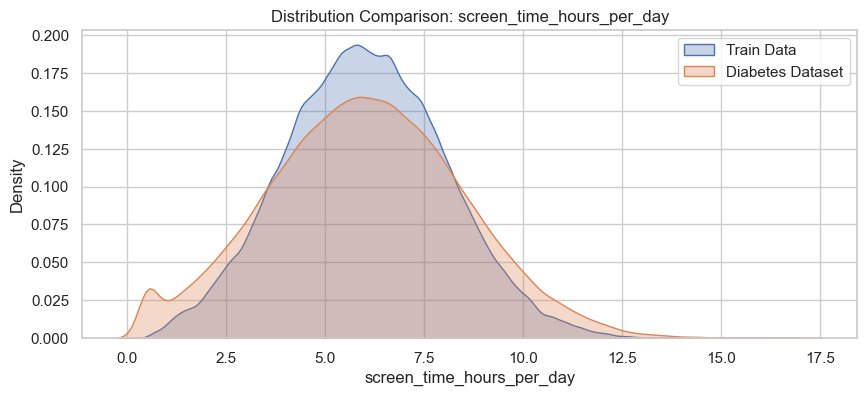

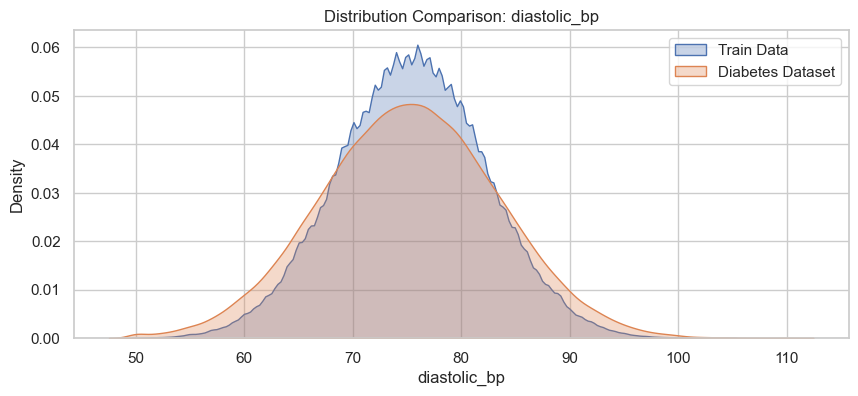

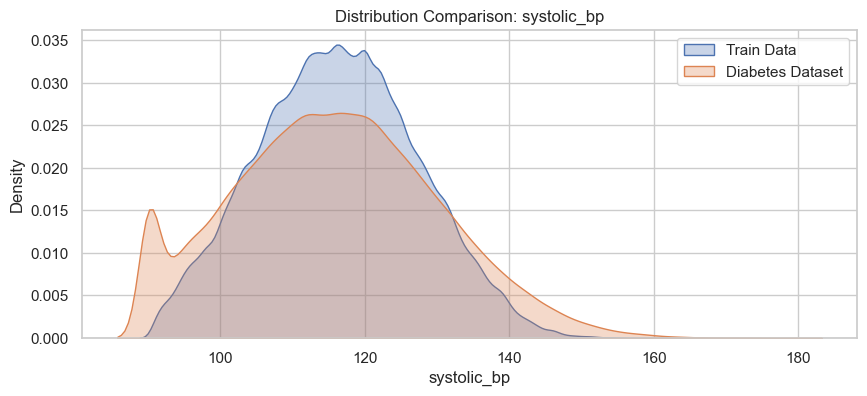

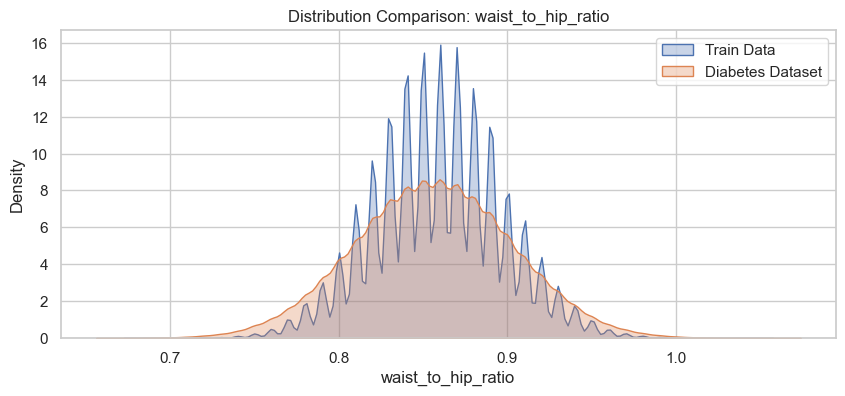

In [15]:
# Identify common columns
common_cols = list(set(df_train.columns) & set(df_diabetes.columns))
print(f"Common columns: {common_cols}")

for col in common_cols:
    if pd.api.types.is_numeric_dtype(df_train[col]):
        plt.figure(figsize=(10, 4))
        sns.kdeplot(df_train[col], label='Train Data', fill=True, alpha=0.3)
        sns.kdeplot(df_diabetes[col], label='Diabetes Dataset', fill=True, alpha=0.3)
        plt.title(f'Distribution Comparison: {col}')
        plt.legend()
        plt.show()